# Feature Selection
"Two variables are **redundant** if they present the same impact over the ongoing discovery process"

"A variable is **irrelevant** if it is not useful for discriminating amongst target variables"

## QSAR Oral Toxicity Dataset

### Imports and data loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC, SMOTE
import csv
import numpy as np
import seaborn as sns

data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
    
y = data.pop(1024)
X = data

data.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Redundancy & Variance analysis

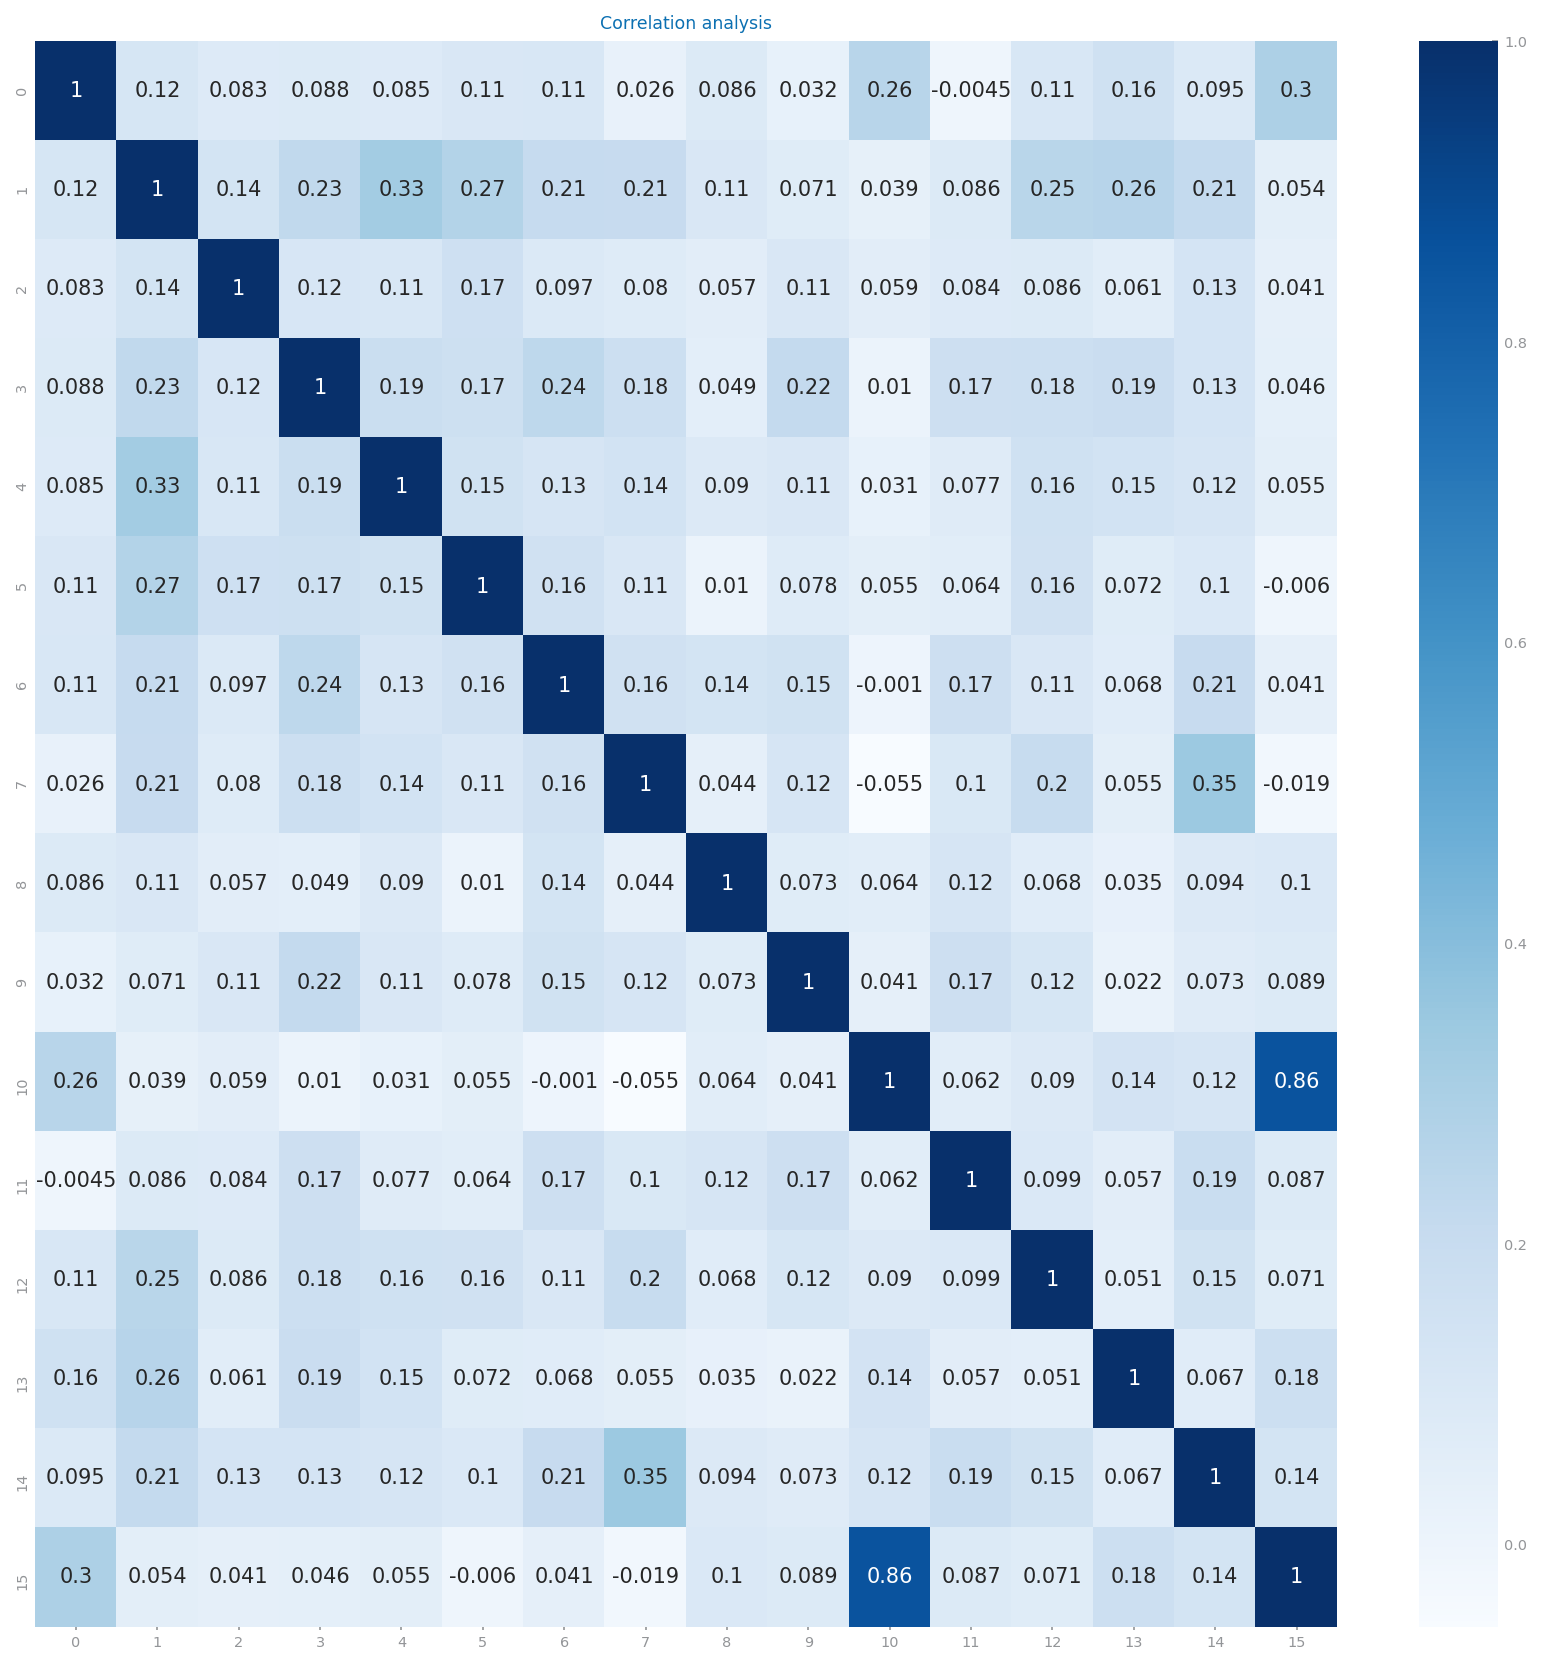

In [38]:
data = pd.read_csv('../datasets/oral_reduced/ORAL_reduced64.csv', sep=';', header=None)
data.pop(16)
fig = plt.figure(figsize=[14,14])
corr_mtx = data.corr()

sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

0  -  1.5152292742959075e+37
1  -  1.42398586621157e+37
2  -  2.4765269517226266e+36
3  -  4.109066749504713e+36
4  -  2.5853989203127558e+36
5  -  1.9838408733370623e+37
6  -  3.8526143279104194e+36
7  -  4.6240138766034755e+36
8  -  2.997160670267389e+36
9  -  8.845503426651087e+36
10  -  2.265359076534705e+37
11  -  6.125292694366693e+36
12  -  7.867826193108918e+36
13  -  4.757494047245035e+36
14  -  5.858994947138363e+36
15  -  2.184400232291673e+37


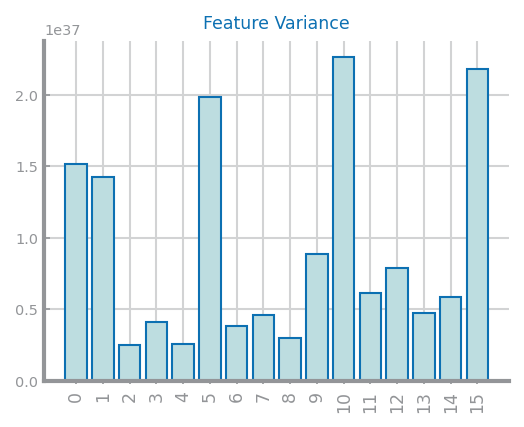

In [40]:
x_fs = []
y_fs = []
for i in data.columns:
    y_fs.append(data[i].var())
    x_fs.append(str(i))
    
plt.figure()
ds.bar_chart(x_fs, y_fs, title='Feature Variance')
plt.xticks(rotation=90)

for i in data.columns:
    print(i, " - ", data[i].var())

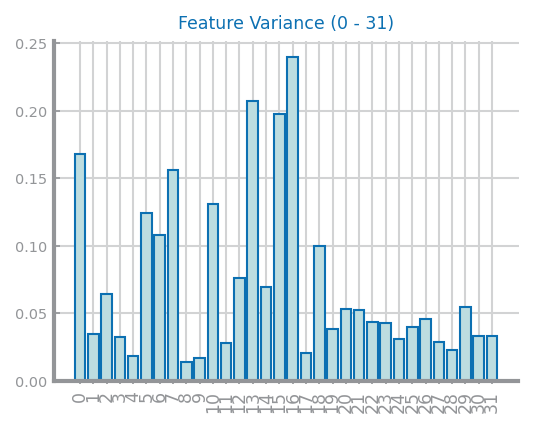

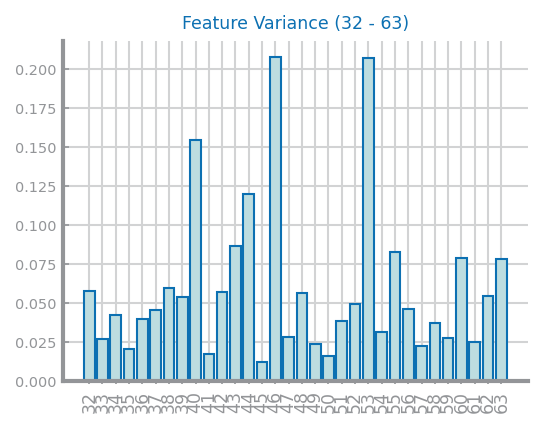

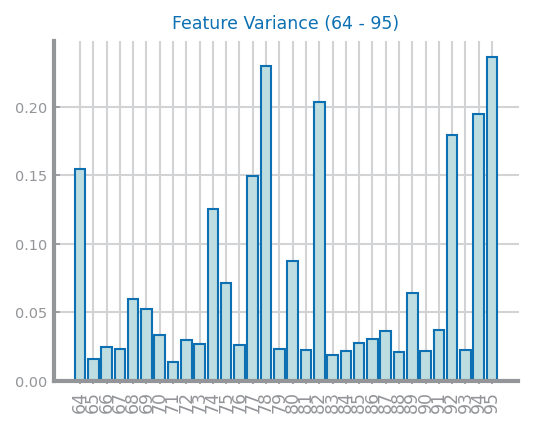

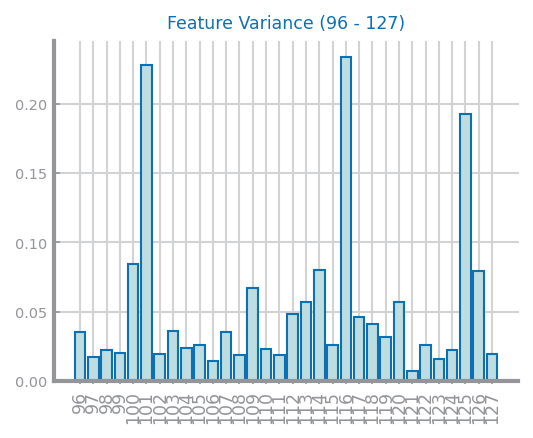

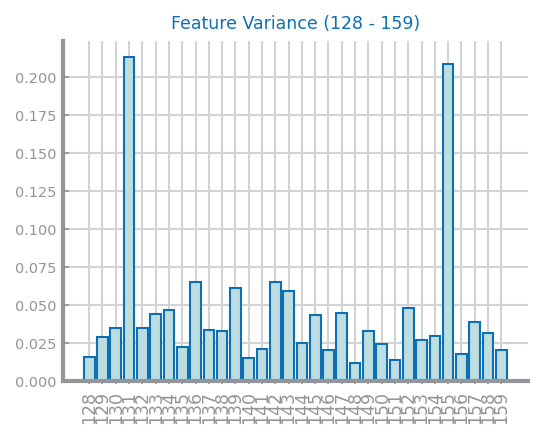

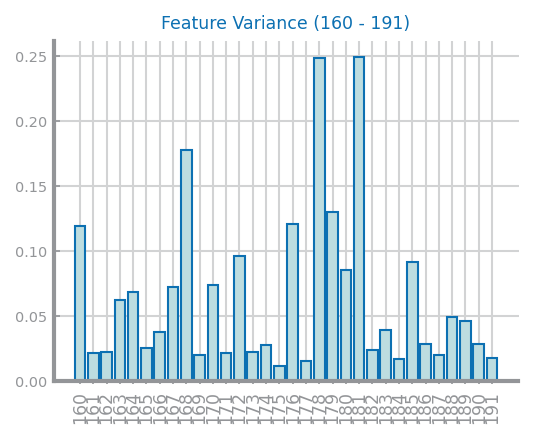

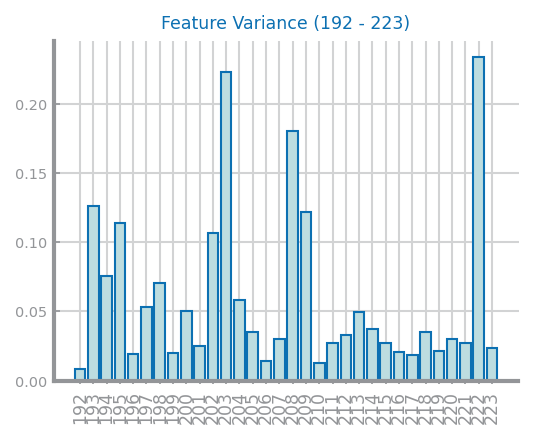

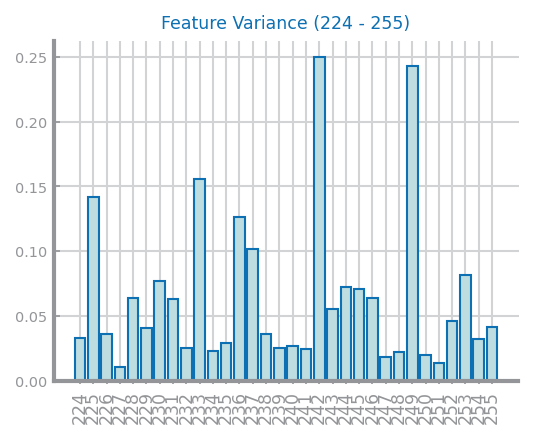

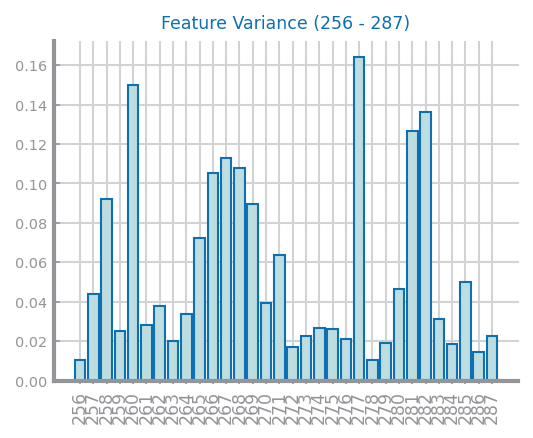

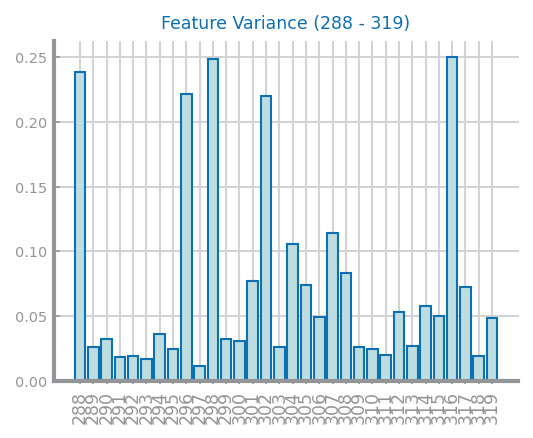

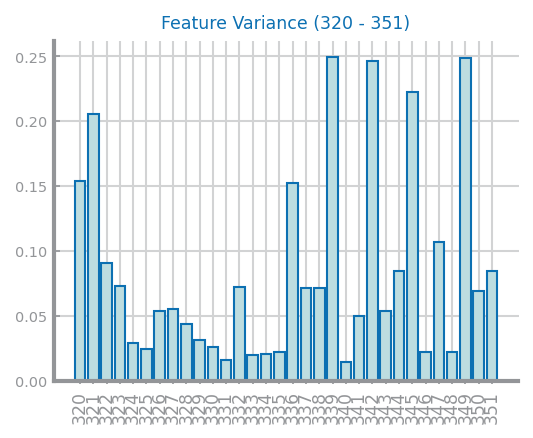

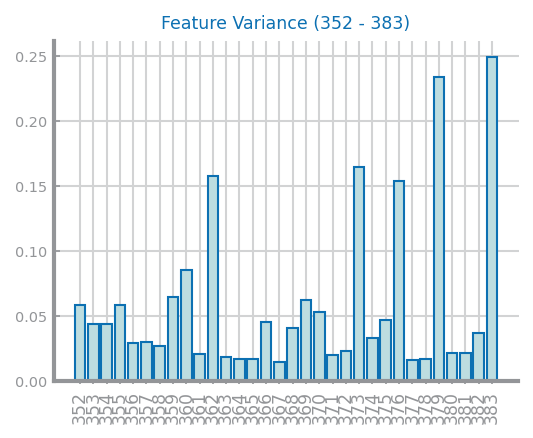

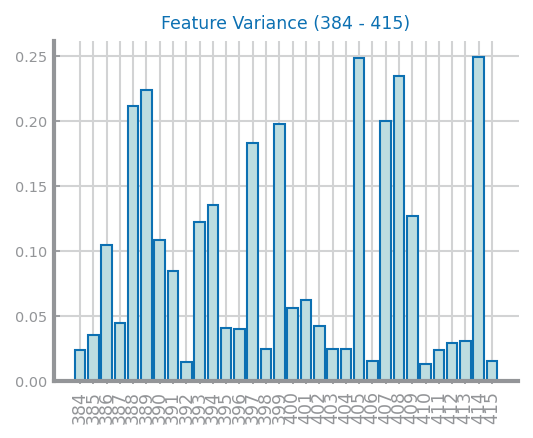

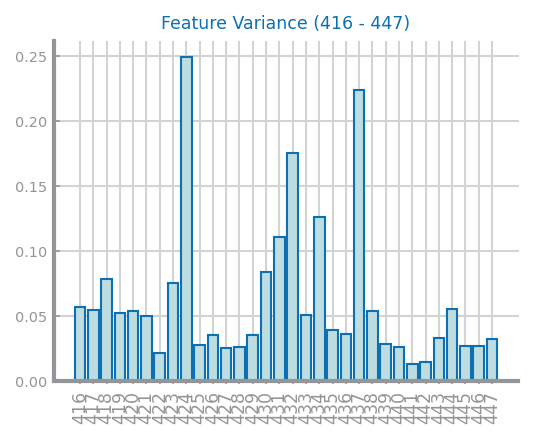

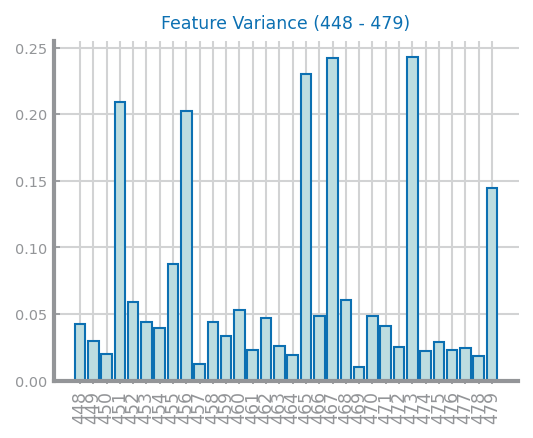

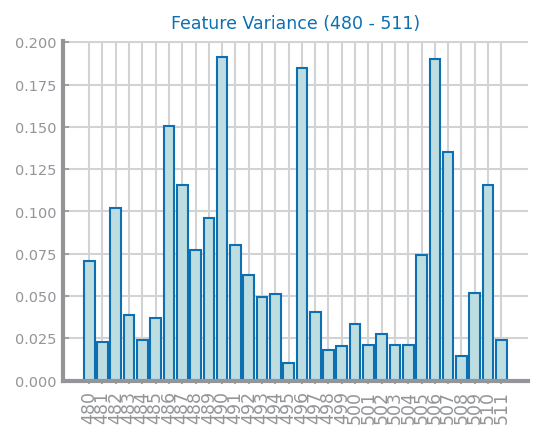

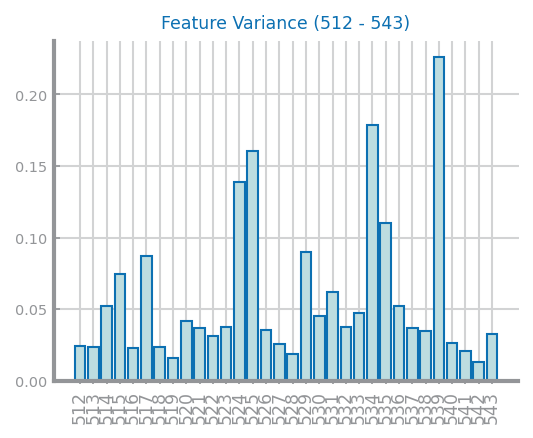

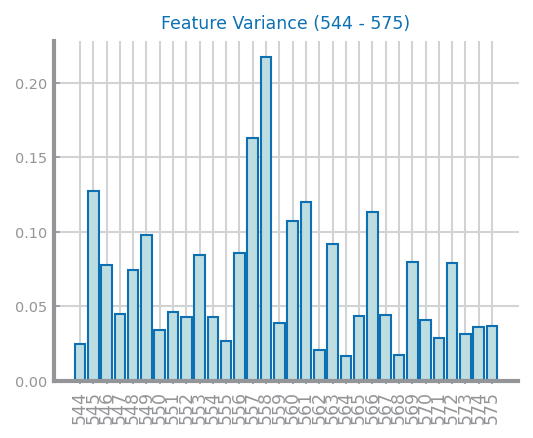

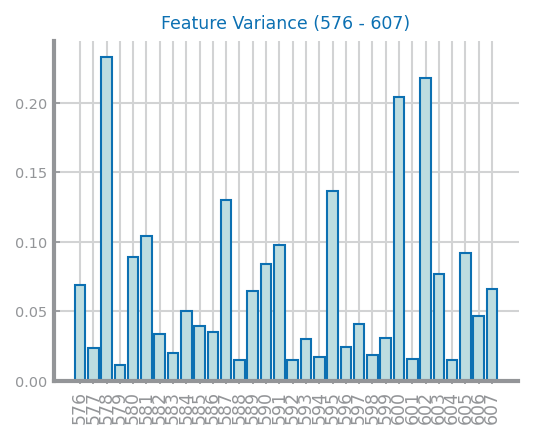

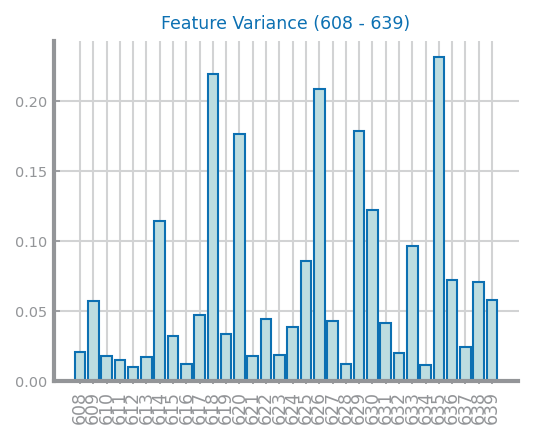

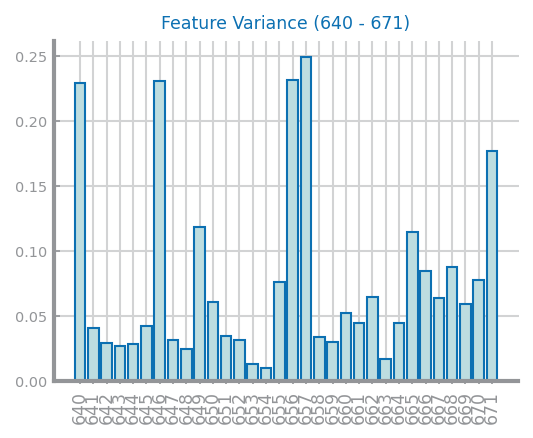

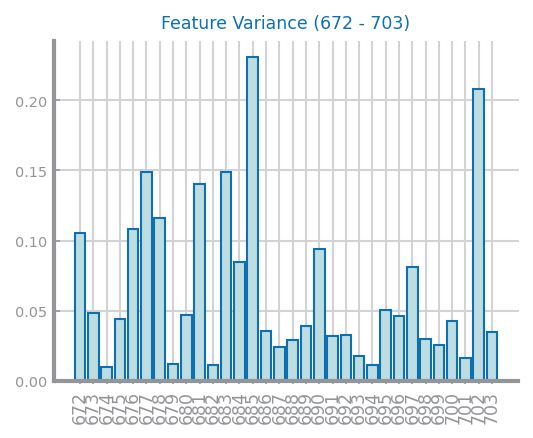

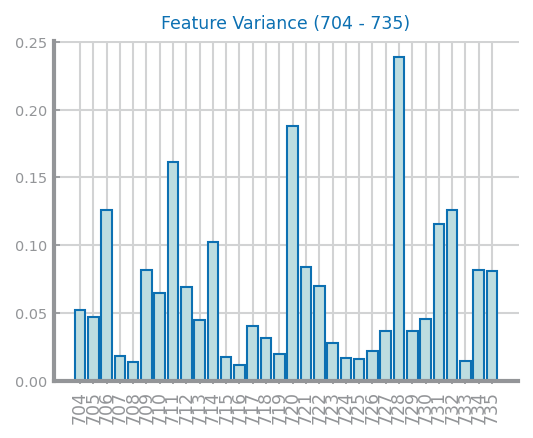

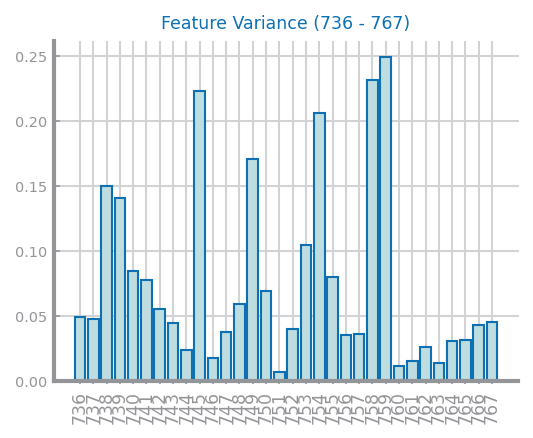

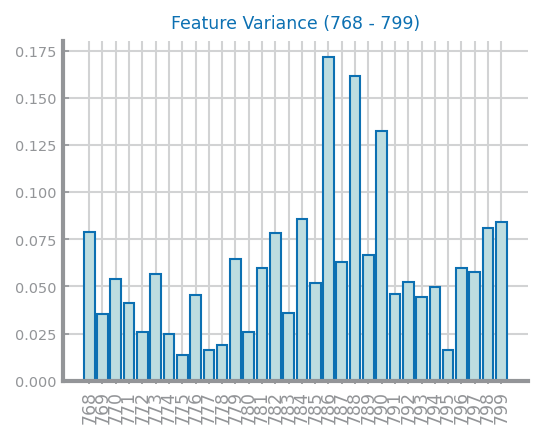

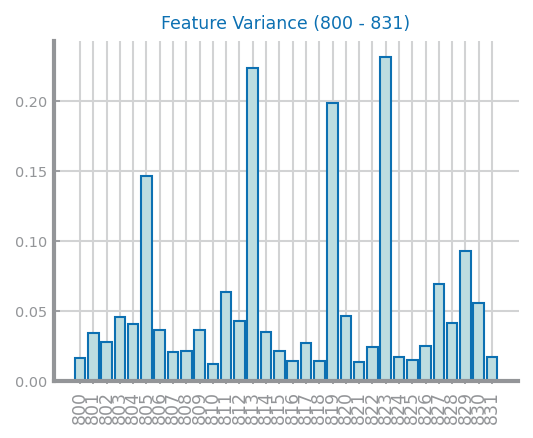

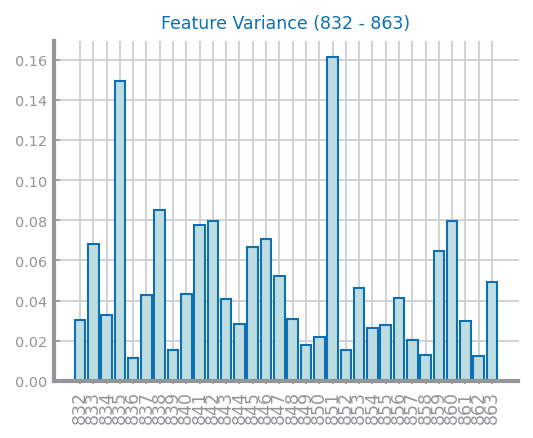

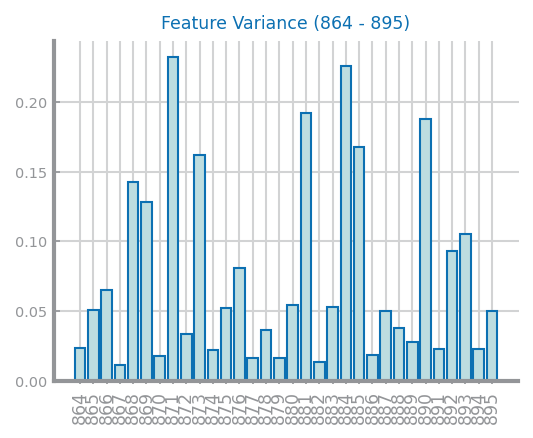

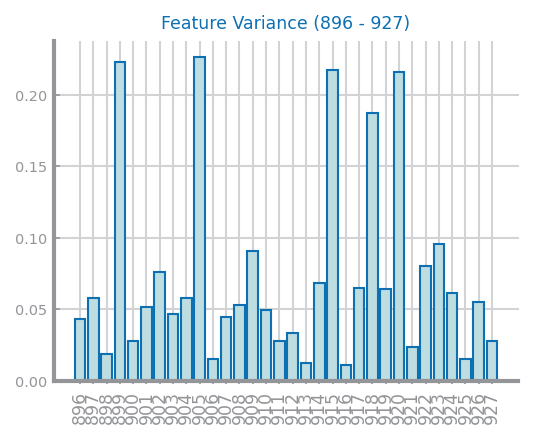

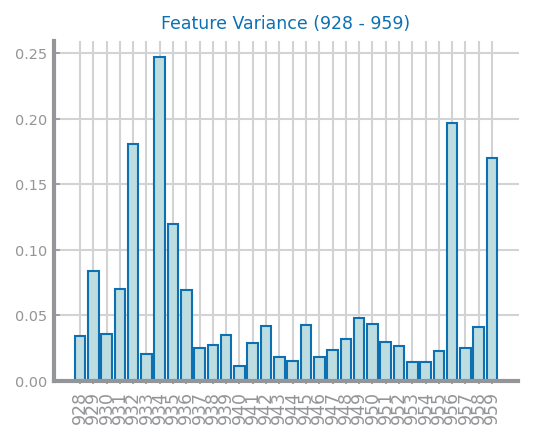

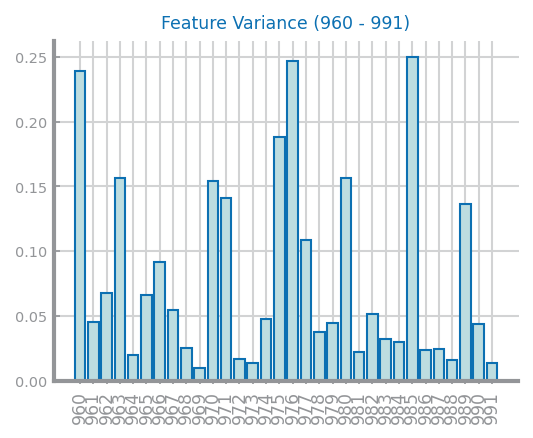

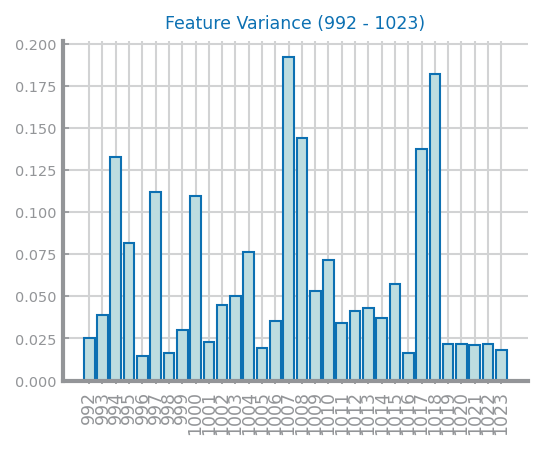

In [41]:
data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
data.pop(1024)

x_fs = []
y_fs = []
initial = 0
for i in data.columns:
    y_fs.append(data[i].var())
    x_fs.append(str(i))
    
    if(len(x_fs) == 32):
        plt.figure()
        ds.bar_chart(x_fs,y_fs, title='Feature Variance (' + str(initial) + " - " + str(i) + ")")
        plt.xticks(rotation=90)
        x_fs = []
        y_fs = []
        initial = i+1

### Univariate Selection
"Statistical tests can be used to select those features that have the strongest relationship with the output variable." - https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. - https://scikit-learn.org/stable/modules/feature_selection.html

#### ANOVA 
ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

In [123]:
anova_selector = SelectKBest(f_classif, k=800)
anova_selector.fit(X, y)
anova_support = anova_selector.get_support()
anova_feature = X.loc[:,anova_support].columns.tolist()
print(str(len(anova_feature)), 'selected features')
print(anova_feature)

800 selected features
[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 81, 82, 85, 86, 87, 88, 89, 91, 92, 93, 95, 96, 97, 99, 100, 101, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 116, 118, 120, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 155, 157, 158, 160, 161, 163, 164, 166, 167, 168, 169, 170, 172, 173, 174, 176, 179, 180, 182, 183, 184, 185, 188, 189, 190, 191, 192, 193, 194, 195, 196, 201, 202, 203, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 265, 266, 267, 2

In [124]:
data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

store_data = data.copy()
for col in data.columns.tolist():
    if col not in anova_feature and col != 1024:
        store_data.drop(col, axis=1, inplace=True)
len(store_data.columns)
store_data.to_csv(r'../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_anova.csv',sep=';', index=False, header=False)
store_data.head()

,0,1,2,3,5,6,7,9,10,11,...,1010,1012,1014,1015,1016,1017,1018,1019,1023,1024
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,negative
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


#### Chi-Squared - Filter
"We calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values." - https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [125]:
chi_selector = SelectKBest(chi2, k=800)
chi_selector.fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

800 selected features
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 81, 82, 85, 86, 87, 88, 89, 91, 92, 93, 95, 96, 97, 99, 100, 101, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 116, 118, 120, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 155, 157, 158, 160, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 179, 180, 182, 183, 184, 185, 188, 189, 190, 191, 192, 193, 194, 195, 196, 201, 202, 203, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 263, 265, 266, 267, 268

In [126]:
data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

store_data = data.copy()
for col in data.columns.tolist():
    if col not in chi_feature and col != 1024:
        store_data.drop(col, axis=1, inplace=True)

store_data.to_csv(r'../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_chi.csv',sep=';', index=False, header=False)
store_data.head()

,0,1,2,3,4,5,6,7,9,10,...,1010,1012,1014,1015,1016,1017,1018,1019,1023,1024
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


#### Mutual Information - Filter
Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In [127]:
mutual_selector = SelectKBest(mutual_info_classif, k=800)
mutual_selector.fit(X, y)
mutual_support = mutual_selector.get_support()
mutual_feature = X.loc[:,mutual_support].columns.tolist()
print(str(len(mutual_feature)), 'selected features')
print(mutual_feature)

800 selected features
[1, 2, 3, 5, 7, 12, 13, 14, 16, 19, 20, 21, 22, 25, 32, 33, 35, 36, 37, 38, 39, 43, 44, 48, 50, 51, 52, 53, 54, 55, 59, 61, 62, 63, 64, 65, 66, 68, 70, 72, 73, 74, 75, 77, 80, 82, 84, 85, 87, 89, 90, 91, 92, 93, 95, 98, 100, 102, 103, 104, 105, 106, 107, 109, 110, 112, 114, 117, 119, 121, 122, 123, 125, 126, 127, 129, 130, 131, 133, 135, 137, 138, 140, 147, 148, 150, 151, 153, 154, 155, 159, 163, 164, 166, 167, 168, 170, 172, 174, 176, 177, 178, 179, 182, 185, 187, 188, 191, 194, 196, 198, 199, 201, 202, 203, 206, 207, 208, 212, 213, 214, 215, 217, 218, 222, 223, 225, 226, 228, 231, 234, 236, 239, 240, 245, 246, 247, 248, 251, 252, 253, 254, 255, 259, 261, 262, 263, 264, 265, 270, 271, 272, 273, 274, 277, 278, 281, 282, 283, 287, 288, 291, 292, 296, 301, 302, 303, 304, 305, 307, 308, 309, 311, 314, 315, 317, 318, 319, 320, 323, 324, 326, 327, 330, 331, 333, 335, 337, 338, 339, 340, 341, 342, 343, 344, 347, 348, 349, 350, 351, 352, 358, 361, 362, 366, 367, 369, 370

In [128]:
data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

store_data = data.copy()
for col in data.columns.tolist():
    if col not in mutual_feature and col != 1024:
        store_data.drop(col, axis=1, inplace=True)

store_data.to_csv(r'../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_mutual.csv', sep=';',index=False, header=False)
store_data.head()

,1,2,3,5,7,12,13,14,16,19,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,negative


#### Mixing

In [129]:
data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
    
y = data.pop(1024)
X = data

# put all selection together
feature_selection_df = pd.DataFrame({'Feature':X.columns.tolist(), 'ANOVA':anova_support, 'Chi-2':chi_support, 'Mutual': mutual_support})
# count the selected times for each feature
feature_selection_df['Total'] = feature_selection_df.drop('Feature', axis=1).sum(axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head()

,Feature,ANOVA,Chi-2,Mutual,Total
1,1023,True,True,True,3
2,1019,True,True,True,3
3,1018,True,True,True,3
4,1017,True,True,True,3
5,1016,True,True,True,3


In [130]:
data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

feature_selection_df.drop(feature_selection_df[feature_selection_df.Total < 2].index, inplace=True)

store_data = data.copy()
for col in data.columns.tolist():
    if col not in feature_selection_df['Feature'].tolist() and col != 1024:
        store_data.drop(col, axis=1, inplace=True)

store_data.to_csv(r'../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_mixed.csv', index=False,sep=';', header=False)
store_data.head()

,0,1,2,3,5,6,7,9,10,11,...,1010,1012,1014,1015,1016,1017,1018,1019,1023,1024
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,negative
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


### Feature Importance
"Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable."

"Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset."

-https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [135]:
data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

y = data.pop(1024)
X = data

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #Use inbuilt class feature_importances of tree based classifiers

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True, inplace=True)

#Remove features with importance under 0.001
feat_importances.drop(feat_importances[feat_importances.values < 0.001].index, inplace=True)

feat_importances.sort_values(ascending=True, inplace=True)

feat_importances
feat_importances.shape

[0.00113952 0.00092222 0.00220484 ... 0.0003958  0.00040994 0.00036433]


(324,)

In [136]:
data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

store_data = data.copy()
for col in data.columns.tolist():
    if col not in feat_importances.index.tolist() and col != 1024:
        store_data.drop(col, axis=1, inplace=True)

store_data.to_csv(r'../datasets/oral_feature_engineering/feature_selection/importance/ORAL_extraTreeClassifier.csv', index=False, header=False,sep=';')
store_data.head()

,0,2,3,6,7,10,13,14,15,16,...,1000,1005,1007,1008,1009,1012,1015,1017,1018,1024
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,negative
1,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,negative
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,negative
3,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,negative
4,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,negative


<br/>
<br/>
<br/>
<br/>
<br/>

### Create Reduced Datasets

### Univariate Selection
"Statistical tests can be used to select those features that have the strongest relationship with the output variable." - https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. - https://scikit-learn.org/stable/modules/feature_selection.html

#### ANOVA 
ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

In [134]:
import csv


#800 cols -> 32 features of 25 bit each
with open('../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_anova.csv', newline='') as original_data:
    with open('../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_reduced32_anova.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 24:
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
                    
            new_row.append(row[-1]) #Append the target variable
                    
            writer.writerow(new_row)

#### Chi-Squared - Filter
"We calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values." - https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [133]:
#800 cols -> 32 features of 25 bit each
with open('../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_chi.csv', newline='') as original_data:
    with open('../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_reduced32_chi.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 24:
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
                    
            new_row.append(row[-1]) #Append the target variable
                    
            writer.writerow(new_row)

#### Mutual Information - Filter
Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In [132]:
#800 cols -> 32 features of 25 bit each
with open('../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_mutual.csv', newline='') as original_data:
    with open('../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_reduced32_mutual.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 24:
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
            
            new_row.append(row[-1]) #Append the target variable
                    
            writer.writerow(new_row)

#### Mixing

In [154]:
#800 cols -> 32 features of 25 bit each
with open('../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_mixed.csv', newline='') as original_data:
    with open('../datasets/oral_feature_engineering/feature_selection/univariate/ORAL_reduced32_mixed.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 24:
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
            new_row.append(row[-1]) #Append the target variable
            
            writer.writerow(new_row)

### Feature Importance
"Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable."

"Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset."

-https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [162]:
#324 cols -> 30 features of 11 bits each (6 artificially added bits on the last feature)
with open('../datasets/oral_feature_engineering/feature_selection/importance/ORAL_extraTreeClassifier.csv', newline='') as original_data:
    with open('../datasets/oral_feature_engineering/feature_selection/importance/ORAL_reduced30_extraTreeClassifier.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                if bit == "negative" or bit == "positive":
                    new_var += "000000" #Add the missing bits
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                    break
                    
                new_var += bit
                    
                if i == 10:
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1

            new_row.append(row[-1]) #Append the target variable
                   
            writer.writerow(new_row)